<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Unsupervised%2BSemi-Supervised/Hierarchical_Clustering_on_E_commerce_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use hierarchical clustering to group similar customers or products based on features
like purchase frequency, average spend, or product aributes.

Load E-commerce Customer Data

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

Normalize Features

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only the numerical columns for scaling
# Based on the variable information, 'Quantity' and 'UnitPrice' are numerical features.
numerical_cols = ['Quantity', 'UnitPrice']
X_numerical = X[numerical_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Display the first few rows of the scaled data
display(pd.DataFrame(X_scaled, columns=numerical_cols).head())

,Quantity,UnitPrice
0,-0.016289,-0.021301
1,-0.016289,-0.012620
2,-0.007118,-0.019234
3,-0.016289,-0.012620
4,-0.016289,-0.012620


Apply Hierarchical Clustering with AgglomerativeClustering

In [5]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Due to the large size of the dataset, let's select a smaller sample for clustering
# This will help to avoid long execution times and memory issues
sample_size = 10000
X_sample = X_scaled[:sample_size]

# Apply hierarchical clustering
# We'll use the Ward linkage method and specify the number of clusters (e.g., 5)
n_clusters = 5
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = hierarchical_cluster.fit_predict(X_sample)

# Display the cluster labels for the sample
display(labels)

array([1, 1, 1, ..., 1, 1, 1])

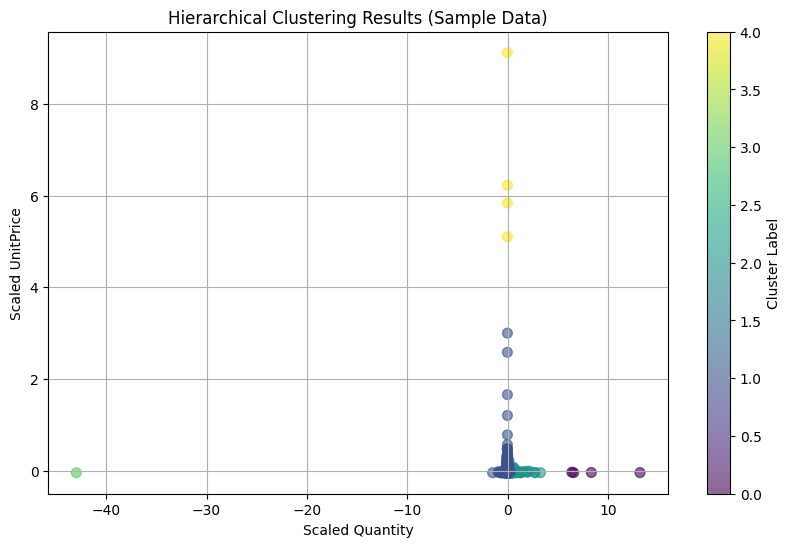

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the sample data with cluster labels
clustered_sample_df = pd.DataFrame(X_sample, columns=['Quantity', 'UnitPrice'])
clustered_sample_df['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(clustered_sample_df['Quantity'], clustered_sample_df['UnitPrice'], c=clustered_sample_df['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Hierarchical Clustering Results (Sample Data)')
plt.xlabel('Scaled Quantity')
plt.ylabel('Scaled UnitPrice')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

Apply Hierarchical Clustering

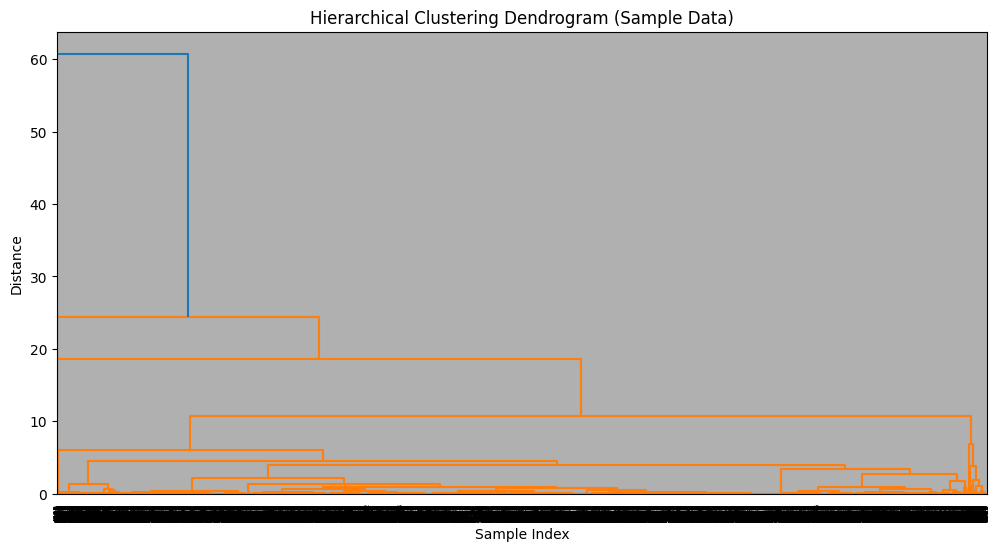

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute the linkage matrix using the sampled and scaled data
# We'll use the 'ward' method as before
Z = linkage(X_sample, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Sample Data)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

Assign Cluster Labels

In [9]:
from scipy.cluster.hierarchy import fcluster
# Create flat clusters by cutting dendrogram at a height
# Use clustered_sample_df instead of df as df is not defined
clustered_sample_df['Cluster'] = fcluster(Z, t=3, criterion='maxclust') # 3 clusters

# Display the first few rows of the updated DataFrame with cluster labels
display(clustered_sample_df.head())

,Quantity,UnitPrice,Cluster
0,-0.016289,-0.021301,2
1,-0.016289,-0.012620,2
2,-0.007118,-0.019234,2
3,-0.016289,-0.012620,2
4,-0.016289,-0.012620,2


Visualize Clusters

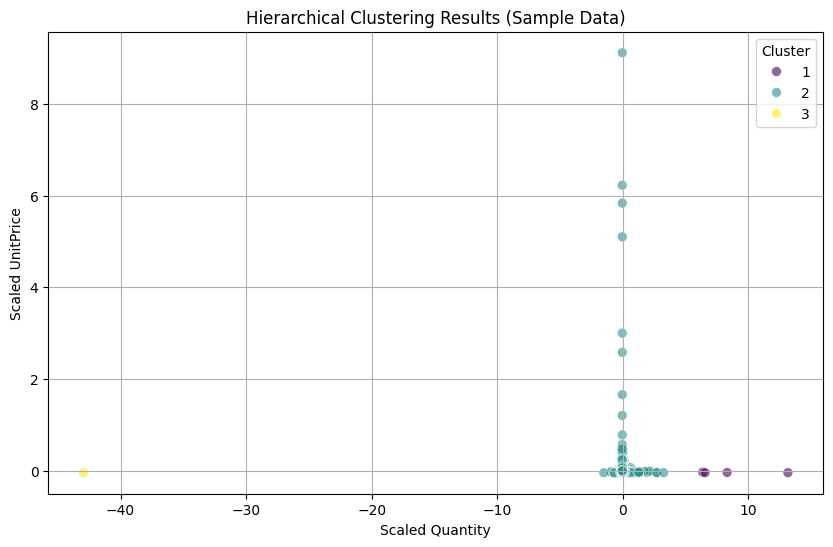

In [12]:
import seaborn as sns
# Plot Quantity vs. UnitPrice with clusters from the sample data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_sample_df, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis', marker='o', s=50, alpha=0.6)
plt.title('Hierarchical Clustering Results (Sample Data)')
plt.xlabel('Scaled Quantity')
plt.ylabel('Scaled UnitPrice')
plt.grid(True)
plt.show()